In [1]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(quantmod)
library(PerformanceAnalytics)
library(reshape2)
library(ggrepel)
library(ggpubr)

options(repr.plot.width=16, repr.plot.height=8)

#initialize
currencies <- Currencies()

In [3]:
# sample: https://github.com/shyams80/plutons/blob/master/docs-R/Currencies.ipynb
# from the sample, we know that USDINR started trading from 2010-10-29
startDate <- as.Date('2010-11-01')
currPair <- 'USDINR'

closestExpiries <- currencies$NseFuturesTimeSeries() %>%
    filter(TIME_STAMP >= startDate & SYMBOL == currPair) %>%
    group_by(TIME_STAMP) %>%
    summarize(EXPIRY_DT = min(EXPIRY)) 

px <- closestExpiries %>% 
    inner_join(currencies$NseFuturesTimeSeries(), by=c('TIME_STAMP' = 'TIME_STAMP', 'EXPIRY_DT' = 'EXPIRY')) %>%
    filter(TIME_STAMP >= startDate & SYMBOL == currPair) %>%
    select(TIME_STAMP, EXPIRY_DT, CLOSE, OI) %>%
    arrange(TIME_STAMP) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP), EXPIRY_DT = as.Date(EXPIRY_DT)) %>%
    as.data.frame()

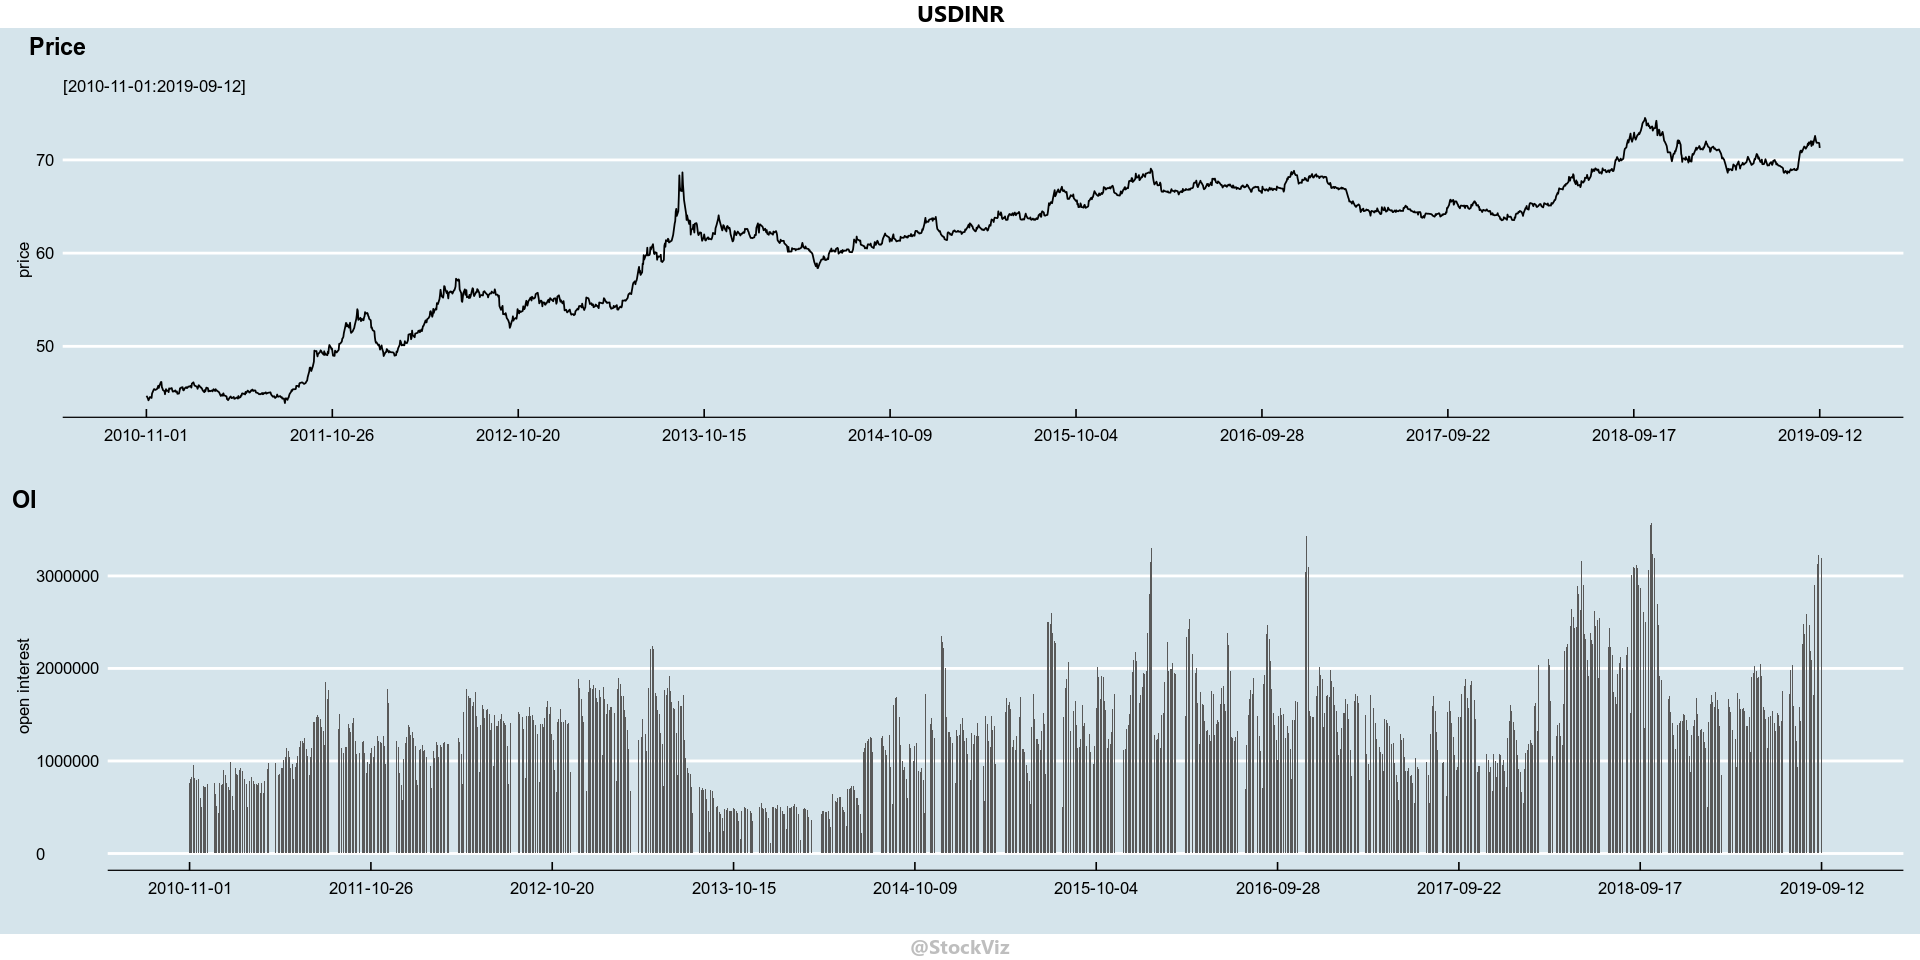

In [4]:
firstDate <- min(px$TIME_STAMP)
lastDate <- max(px$TIME_STAMP)
xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

p1 <- ggplot(px, aes(x=TIME_STAMP, y=CLOSE)) +
    theme_economist() +
    geom_line() +
    scale_x_date(breaks = xAxisTicks) +
    labs(x='', y='price', color='', fill='', 
         title='', subtitle=sprintf("[%s:%s]", firstDate, lastDate))

p2 <- ggplot(px, aes(x=TIME_STAMP, y=OI)) +
    theme_economist() +
    geom_bar(stat="identity") +
    scale_x_date(breaks = xAxisTicks) +
    labs(x='', y='open interest', color='', fill='')

figure <- ggarrange(p1, p2, labels=c("Price", "OI"), ncol=1, nrow=2)
figure <- annotate_figure(figure, 
                top = text_grob(currPair, face = "bold", size = 14, family='Segoe UI'), 
                bottom = text_grob("@StockViz", face="bold", size=12, family="Segoe UI", color='grey'))
print(figure)

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)